In [1]:
import os
import zipfile
#image_default = 1280x720
import tensorflow as tf
import json
import numpy as np
from matplotlib import pyplot as plt
import os
import time
import uuid
import cv2

In [2]:
os.listdir("E:\Work\JUPITERC\Hands\data/images")

['frame_19.jpg',
 'frame_20.jpg',
 'frame_46.jpg',
 'frame_47.jpg',
 'frame_57.jpg',
 'frame_58.jpg',
 'frame_80.jpg',
 'frame_81.jpg',
 'frame_82.jpg',
 'frame_83.jpg',
 'frame_88.jpg']

In [2]:
gpus = tf.config.experimental.list_physical_devices('GPU')
for gpu in gpus: 
    tf.config.experimental.set_memory_growth(gpu, True)

In [3]:
tf.config.list_physical_devices('GPU')

[]

In [5]:
images = tf.data.Dataset.list_files('data\\images\\*.jpg')
images.as_numpy_iterator().next()

def load_image(x): 
    byte_img = tf.io.read_file(x)
    img = tf.io.decode_jpeg(byte_img)
    return img

images = images.map(load_image)

In [6]:
images.as_numpy_iterator().next()

array([[[190, 192, 187],
        [190, 192, 187],
        [190, 192, 187],
        ...,
        [ 83,  76,  66],
        [ 83,  76,  66],
        [ 84,  77,  67]],

       [[190, 192, 187],
        [190, 192, 187],
        [190, 192, 187],
        ...,
        [ 84,  77,  67],
        [ 84,  77,  67],
        [ 85,  78,  68]],

       [[190, 192, 187],
        [190, 192, 187],
        [190, 192, 187],
        ...,
        [ 85,  78,  68],
        [ 84,  77,  67],
        [ 83,  76,  66]],

       ...,

       [[ 39,  34,  31],
        [ 39,  34,  31],
        [ 39,  34,  31],
        ...,
        [ 79,  45,  17],
        [ 79,  45,  17],
        [ 79,  45,  17]],

       [[ 39,  34,  31],
        [ 39,  34,  31],
        [ 39,  34,  31],
        ...,
        [ 78,  44,  16],
        [ 78,  44,  16],
        [ 78,  44,  16]],

       [[ 39,  34,  31],
        [ 39,  34,  31],
        [ 39,  34,  31],
        ...,
        [ 77,  43,  15],
        [ 77,  43,  15],
        [ 78,  44,  16]]

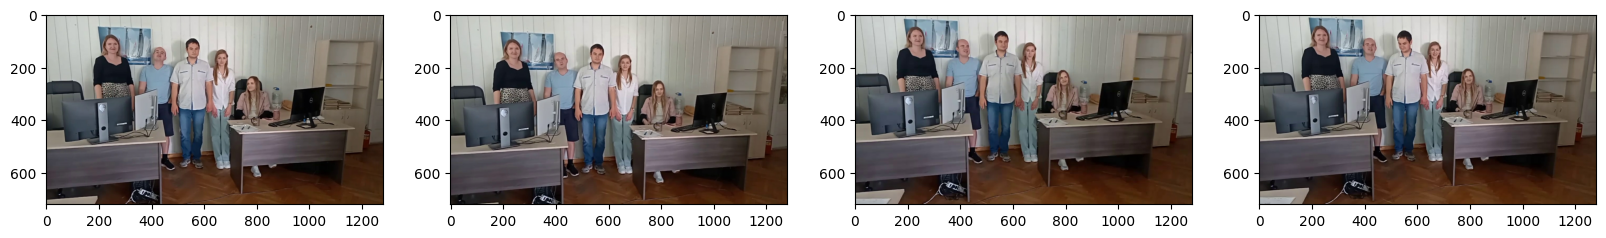

In [7]:
image_generator = images.batch(4).as_numpy_iterator()

plot_images = image_generator.next()

fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx, image in enumerate(plot_images):
    ax[idx].imshow(image) 
plt.show()

In [24]:
def get_image_paths(folder_path, extensions=[".jpg"]):
    image_paths = []
    for filename in os.listdir(folder_path):
        if any(filename.lower().endswith(ext) for ext in extensions):
            image_paths.append(os.path.join(folder_path, filename))
    return image_paths

# Replace 'your_folder_path' with the actual path of the folder containing the images
folder_path = "E:\Work\JUPITERC\Hands\data\images"
image_paths = get_image_paths(folder_path)

print(image_paths)



['E:\\Work\\JUPITERC\\Hands\\data\\images\\frame_0.jpg', 'E:\\Work\\JUPITERC\\Hands\\data\\images\\frame_1.jpg', 'E:\\Work\\JUPITERC\\Hands\\data\\images\\frame_10.jpg', 'E:\\Work\\JUPITERC\\Hands\\data\\images\\frame_11.jpg', 'E:\\Work\\JUPITERC\\Hands\\data\\images\\frame_12.jpg', 'E:\\Work\\JUPITERC\\Hands\\data\\images\\frame_13.jpg', 'E:\\Work\\JUPITERC\\Hands\\data\\images\\frame_14.jpg', 'E:\\Work\\JUPITERC\\Hands\\data\\images\\frame_15.jpg', 'E:\\Work\\JUPITERC\\Hands\\data\\images\\frame_16.jpg', 'E:\\Work\\JUPITERC\\Hands\\data\\images\\frame_17.jpg', 'E:\\Work\\JUPITERC\\Hands\\data\\images\\frame_18.jpg', 'E:\\Work\\JUPITERC\\Hands\\data\\images\\frame_2.jpg', 'E:\\Work\\JUPITERC\\Hands\\data\\images\\frame_21.jpg', 'E:\\Work\\JUPITERC\\Hands\\data\\images\\frame_22.jpg', 'E:\\Work\\JUPITERC\\Hands\\data\\images\\frame_23.jpg', 'E:\\Work\\JUPITERC\\Hands\\data\\images\\frame_24.jpg', 'E:\\Work\\JUPITERC\\Hands\\data\\images\\frame_25.jpg', 'E:\\Work\\JUPITERC\\Hands\\data\

In [27]:
path_to_json_files = 'E:\Work\JUPITERC\Hands\data\labels'
#get all JSON file names as a list
labels = []
json_file_names = [filename for filename in os.listdir(path_to_json_files) if filename.endswith('.json')]

for json_file_name in json_file_names:
    with open(os.path.join(path_to_json_files, json_file_name)) as json_file:
        json_text = json.load(json_file)
        labels.append(os.path.join(path_to_json_files, json_file_name))

print(len(labels))

78


In [ ]:
import shutil
from sklearn.model_selection import train_test_split

# Step 1: Load image paths and corresponding labels
# Assuming you have two lists: 'image_paths' containing file paths of images, and 'labels' containing corresponding labels

# Step 2: Split data into training and test/validation sets (70/30 split)
train_images, test_images, train_labels, test_labels = train_test_split(image_paths, labels, test_size=0.3, random_state=42)

# Step 3: Split the test/validation set into validation and test sets (50/50 split)
val_images, test_images, val_labels, test_labels = train_test_split(test_images, test_labels, test_size=0.5, random_state=42)

# Step 4: Create three folders for the splits
os.makedirs("train", exist_ok=True)
os.makedirs("val", exist_ok=True)
os.makedirs("test", exist_ok=True)

# Move the images to their corresponding folders
def move_images(images, labels, destination_folder):
    for image_path, label in zip(images, labels):
        destination_path = os.path.join(destination_folder, label)
        os.makedirs(destination_path, exist_ok=True)
        shutil.copy(image_path, destination_path)

move_images(train_images, train_labels, "train")
move_images(val_images, val_labels, "val")
move_images(test_images, test_labels, "test")

In [30]:
# 55 train 12 test 11 val
for folder in ['train','test','val']:
    for file in os.listdir(os.path.join('data', folder, 'images')):
        
        filename = file.split('.')[0]+'.json'
        existing_filepath = os.path.join('data','labels', filename)
        if os.path.exists(existing_filepath): 
            new_filepath = os.path.join('data',folder,'labels',filename)
            os.replace(existing_filepath, new_filepath)    

In [4]:
import albumentations as alb

In [63]:
img = cv2.imread('E:\Work\JUPITERC\Hands\data/train\images/frame_0.jpg')
print(img.shape)

(720, 1280, 3)


In [64]:
augmentor = alb.Compose([alb.RandomCrop(width=1280, height=720), 
                         alb.HorizontalFlip(p=0.5), 
                         alb.RandomBrightnessContrast(p=0.2),
                         alb.RandomGamma(p=0.2), 
                         alb.RGBShift(p=0.2), 
                         alb.VerticalFlip(p=0.5)], 
                       bbox_params=alb.BboxParams(format='albumentations', 
                                                  label_fields=['class_labels']))

In [65]:
img = cv2.imread(os.path.join('data','train', 'images','frame_12.jpg'))

In [66]:
with open(os.path.join('data', 'train', 'labels', 'frame_12.json'), 'r') as f:
    label = json.load(f)

In [67]:
coords = [item['points'] for item in label['shapes']]
print(coords)

[[[472.8402366863905, 169.46745562130178], [510.1183431952663, 224.49704142011834]], [[165.14792899408278, 125.68047337278105], [210.11834319526622, 192.54437869822485]], [[691.7751479289941, 201.42011834319527], [726.094674556213, 249.34911242603548]], [[813.6686390532544, 275.97633136094674], [844.4378698224853, 323.905325443787]], [[320.17751479289933, 205.5621301775148], [374.0236686390532, 264.1420118343195]]]


In [68]:
coords_resize = [[[(item[0] / 1280), (item[1] / 720)] for item in sublist] for sublist in coords]
print(coords_resize)

[[[0.3694064349112426, 0.23537146614069693], [0.3985299556213018, 0.311801446416831]], [[0.12902181952662717, 0.17455621301775145], [0.16415495562130172, 0.267422748191979]], [[0.5404493343195267, 0.279750164365549], [0.5672614644970414, 0.34631821170282706]], [[0.635678624260355, 0.38330046022353714], [0.6597170857988166, 0.44986850756081526]], [[0.2501386834319526, 0.28550295857988167], [0.2922059911242603, 0.3668639053254437]]]


In [69]:
import ast 
nested_list = ast.literal_eval(str(coords_resize))
coords_reshape = [item[0] + item[1] for item in nested_list]
print(coords_reshape)

[[0.3694064349112426, 0.23537146614069693, 0.3985299556213018, 0.311801446416831], [0.12902181952662717, 0.17455621301775145, 0.16415495562130172, 0.267422748191979], [0.5404493343195267, 0.279750164365549, 0.5672614644970414, 0.34631821170282706], [0.635678624260355, 0.38330046022353714, 0.6597170857988166, 0.44986850756081526], [0.2501386834319526, 0.28550295857988167, 0.2922059911242603, 0.3668639053254437]]


In [70]:
len(coords_reshape)

5

In [71]:
augmentor(image=img, bboxes=[coords_reshape[1]], class_labels=['palm'])

{'image': array([[[ 15,  44,  75],
         [ 15,  44,  75],
         [ 15,  44,  75],
         ...,
         [ 29,  28,  32],
         [ 29,  28,  32],
         [ 28,  27,  31]],
 
        [[ 15,  44,  75],
         [ 15,  44,  75],
         [ 15,  44,  75],
         ...,
         [ 30,  29,  33],
         [ 29,  28,  32],
         [ 29,  28,  32]],
 
        [[ 15,  44,  75],
         [ 15,  44,  75],
         [ 15,  44,  75],
         ...,
         [ 29,  28,  32],
         [ 29,  28,  32],
         [ 29,  28,  32]],
 
        ...,
 
        [[ 70,  80,  87],
         [ 70,  80,  87],
         [ 70,  80,  87],
         ...,
         [189, 194, 192],
         [189, 194, 192],
         [189, 194, 192]],
 
        [[ 70,  80,  87],
         [ 70,  80,  87],
         [ 70,  80,  87],
         ...,
         [189, 194, 192],
         [189, 194, 192],
         [189, 194, 192]],
 
        [[ 67,  77,  84],
         [ 67,  77,  84],
         [ 67,  77,  84],
         ...,
         [189, 194,

In [72]:
augmented = []
i = 0
while i < len(coords_reshape):
    print(augmentor(image=img, bboxes=[coords_reshape[i]], class_labels=['palm']))
    augmented.append(augmentor(image=img, bboxes=[coords_reshape[i]], class_labels=['palm']))
    i += 1
print(augmented[2]['bboxes'])

{'image': array([[[ 62,  53,  83],
        [ 62,  53,  83],
        [ 62,  53,  83],
        ...,
        [199, 185, 205],
        [199, 185, 205],
        [199, 185, 205]],

       [[ 65,  56,  86],
        [ 65,  56,  86],
        [ 65,  56,  86],
        ...,
        [199, 185, 205],
        [199, 185, 205],
        [199, 185, 205]],

       [[ 65,  56,  86],
        [ 65,  56,  86],
        [ 65,  56,  86],
        ...,
        [199, 185, 205],
        [199, 185, 205],
        [199, 185, 205]],

       ...,

       [[ 10,  16,  73],
        [ 10,  16,  73],
        [ 10,  16,  73],
        ...,
        [ 19,   0,  24],
        [ 19,   0,  24],
        [ 19,   0,  24]],

       [[ 10,  16,  73],
        [ 10,  16,  73],
        [ 10,  16,  73],
        ...,
        [ 20,   0,  25],
        [ 19,   0,  24],
        [ 19,   0,  24]],

       [[ 10,  16,  73],
        [ 10,  16,  73],
        [ 10,  16,  73],
        ...,
        [ 19,   0,  24],
        [ 19,   0,  24],
        [ 18, 

In [73]:
augmented[1]['bboxes']

[(0.12902181952662717,
  0.17455621301775145,
  0.16415495562130172,
  0.267422748191979)]

In [74]:
augmented[0]['bboxes']

[(0.6014700443786982,
  0.23537146614069693,
  0.6305935650887574,
  0.311801446416831)]

In [75]:
j = 0
while j < len(coords_reshape):
    print(augmented[j]['bboxes'])    
    j += 1
    

[(0.6014700443786982, 0.23537146614069693, 0.6305935650887574, 0.311801446416831)]
[(0.12902181952662717, 0.17455621301775145, 0.16415495562130172, 0.267422748191979)]
[(0.4327385355029586, 0.6536817882971729, 0.4595506656804733, 0.720249835634451)]
[(0.3402829142011834, 0.38330046022353714, 0.36432137573964496, 0.44986850756081526)]
[(0.2501386834319526, 0.6331360946745563, 0.2922059911242603, 0.7144970414201184)]


In [48]:
augmented[0]['bboxes'][0][2:]

(0.8575721153846154, 0.8090072320841551)

In [93]:
d = 3

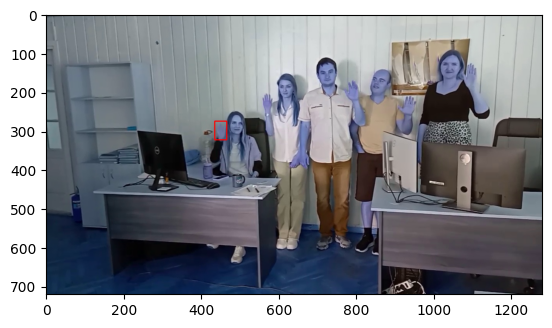

In [94]:
cv2.rectangle(augmented[d]['image'], 
              tuple(np.multiply(augmented[d]['bboxes'][0][:2], [1280,720]).astype(int)),
              tuple(np.multiply(augmented[d]['bboxes'][0][2:], [1280,720]).astype(int)), 
                    (255,0,0), 2)

plt.imshow(augmented[d]['image'])

In [ ]:
for partition in ['train','test','val']: 
    for image in os.listdir(os.path.join('data', partition, 'images')):
        img = cv2.imread(os.path.join('data', partition, 'images', image))

        coords = [0,0,0.00001,0.00001]
        label_path = os.path.join('data', partition, 'labels', f'{image.split(".")[0]}.json')
        if os.path.exists(label_path):
            with open(label_path, 'r') as f:
                label = json.load(f)

            coords[0] = label['shapes'][0]['points'][0][0]
            coords[1] = label['shapes'][0]['points'][0][1]
            coords[2] = label['shapes'][0]['points'][1][0]
            coords[3] = label['shapes'][0]['points'][1][1]
            coords = list(np.divide(coords, [640,480,640,480]))

        try: 
            for x in range(60):
                augmented = augmentor(image=img, bboxes=[coords], class_labels=['face'])
                cv2.imwrite(os.path.join('aug_data', partition, 'images', f'{image.split(".")[0]}.{x}.jpg'), augmented['image'])

                annotation = {}
                annotation['image'] = image

                if os.path.exists(label_path):
                    if len(augmented['bboxes']) == 0: 
                        annotation['bbox'] = [0,0,0,0]
                        annotation['class'] = 0 
                    else: 
                        annotation['bbox'] = augmented['bboxes'][0]
                        annotation['class'] = 1
                else: 
                    annotation['bbox'] = [0,0,0,0]
                    annotation['class'] = 0 


                with open(os.path.join('aug_data', partition, 'labels', f'{image.split(".")[0]}.{x}.json'), 'w') as f:
                    json.dump(annotation, f)

        except Exception as e:
            print(e)